In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Maternal Health Risk Data Set.csv")
df.sample(7)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
63,29,90,70,6.70,98.0,80,mid risk
925,42,90,60,7.50,98.0,76,low risk
762,33,115,65,7.00,98.0,70,mid risk
302,48,120,80,11.00,98.0,88,high risk
97,19,120,80,7.00,98.0,70,mid risk
704,12,100,50,6.00,98.0,70,mid risk
730,20,120,75,7.01,100.0,70,mid risk


<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

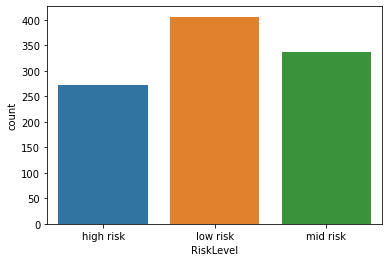

In [11]:
sns.countplot(x=df["RiskLevel"])

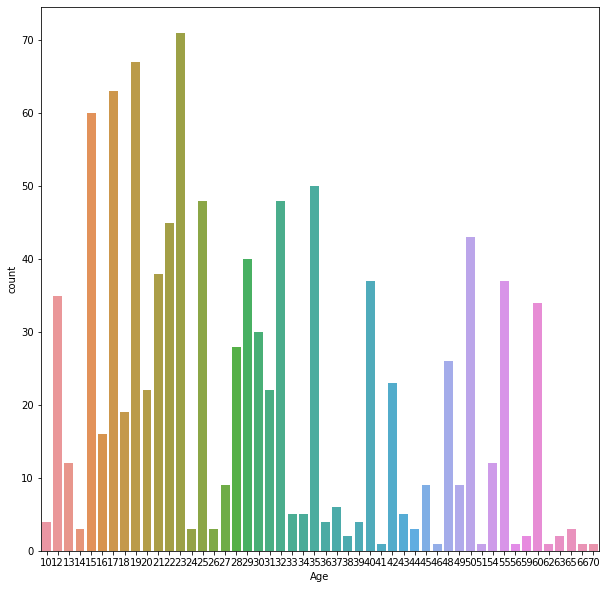

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x=df["Age"]);

In [15]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [17]:
df["RiskLevel"]

0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object

In [18]:
d={"high risk":2,"mid risk":1,"low risk":0}

In [19]:
df["RiskLevel"]=df["RiskLevel"].map(d)

In [20]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


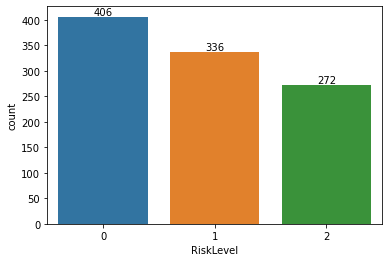

In [21]:
ax=sns.countplot(x=df["RiskLevel"])
ax.bar_label(ax.containers[0]);

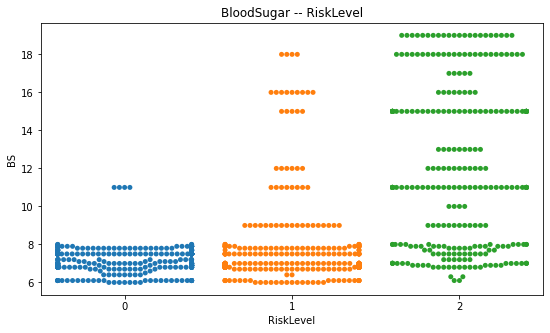

In [23]:
plt.figure(figsize=(9,5))
sns.swarmplot(x="RiskLevel",y="BS",data=df)
plt.title("BloodSugar -- RiskLevel")
plt.show()

In [24]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


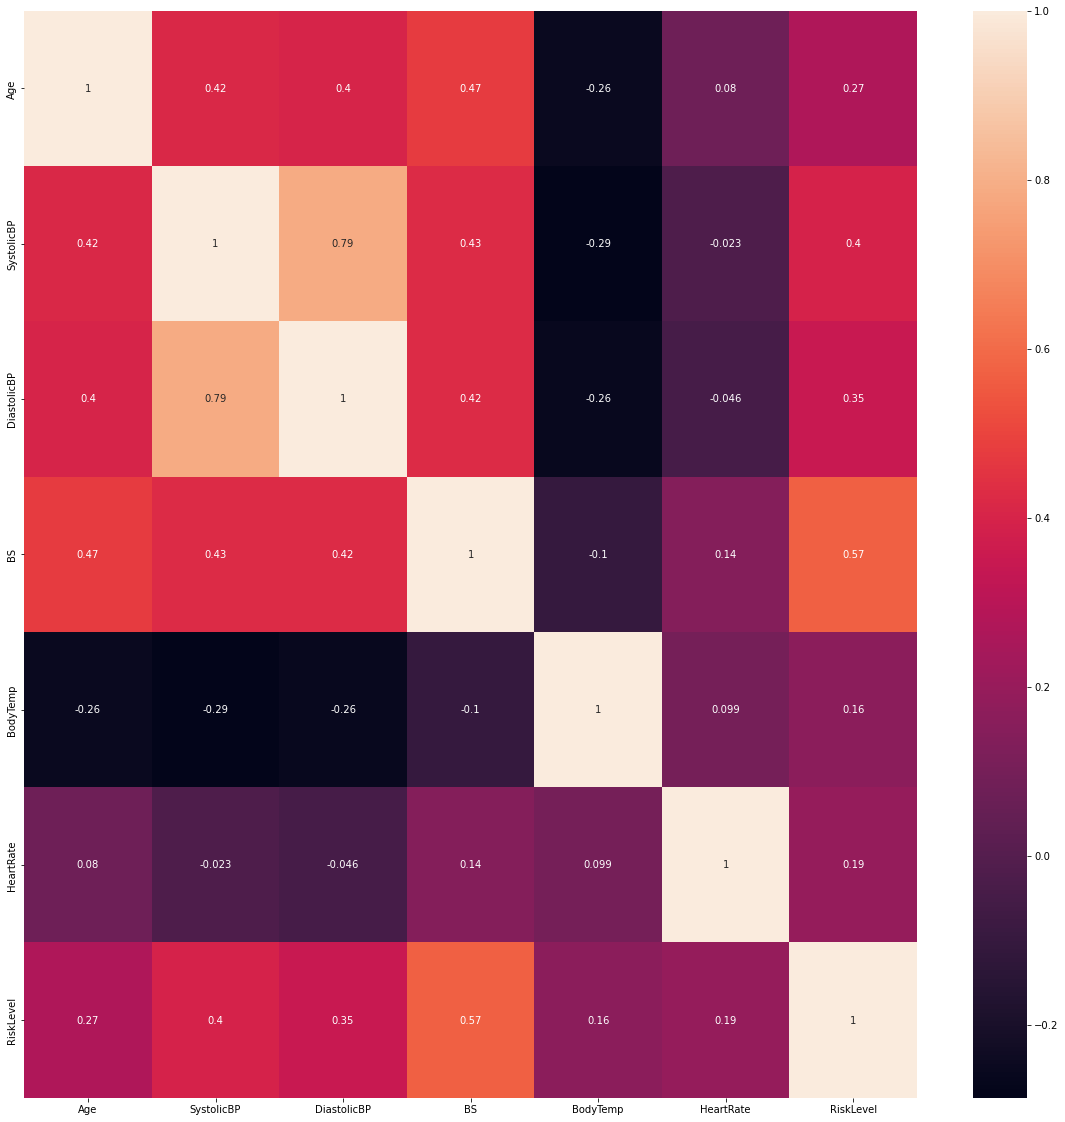

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True);

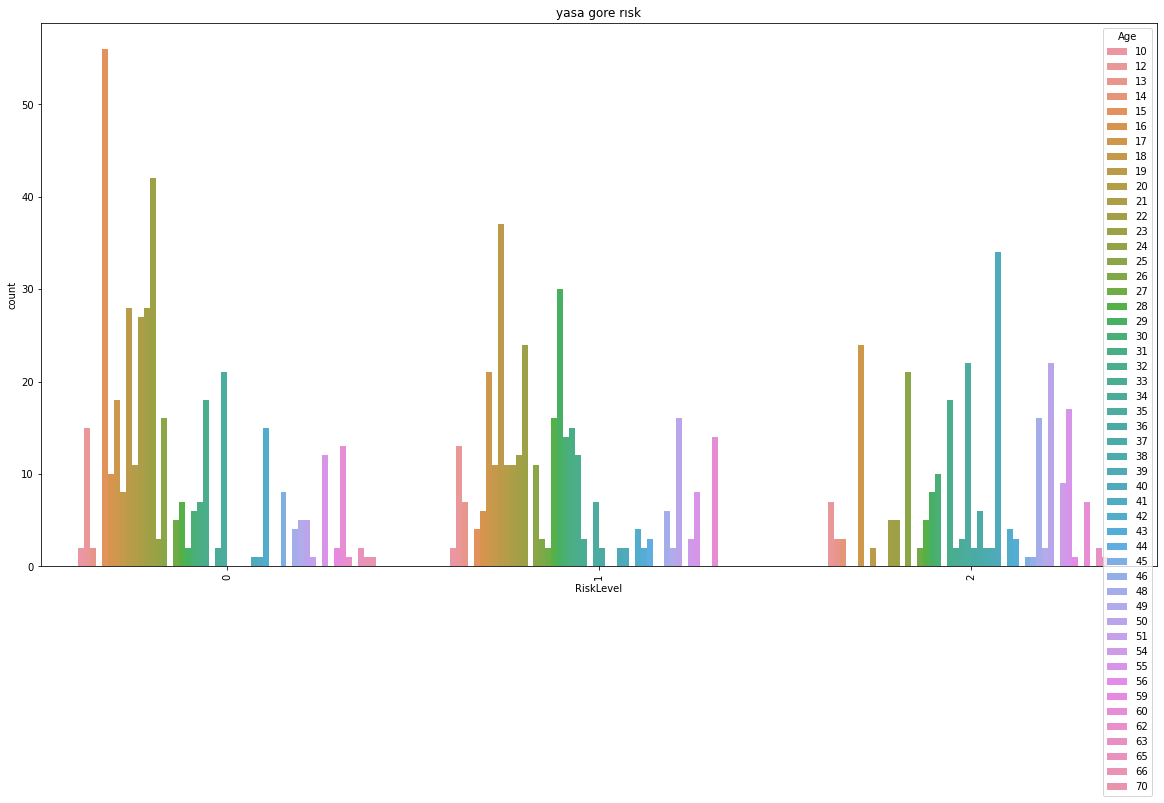

In [28]:
plt.figure(figsize=(20,10))
plt.title("yasa gore rısk")
sns.countplot(x=df["RiskLevel"],hue=df.Age)
plt.xticks(rotation=90);

In [29]:
x=df.drop('RiskLevel',axis=1)
y=df['RiskLevel']

In [30]:
def classification(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    
    algos=[g,b,KN,SVC,D,R,Log]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [31]:
classification(x,y)

,accuracy_score
DecisionTreeClassifier,0.817734
RandomForestClassifier,0.807882
KNeighborsClassifier,0.665025
LogisticRegression,0.625616
SVC,0.596059
GaussianNB,0.576355
BernoulliNB,0.394089
